In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *
import numpy as np

In [26]:
train_path='/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path='/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

In [27]:
image_classes=os.listdir("/kaggle/input/covid19-image-dataset/Covid19-dataset/test")
print(image_classes)

['Normal', 'Viral Pneumonia', 'Covid']


In [28]:
def plot_image(image_classes):
    plt.figure(figsize=(12,12))
    for i , category in enumerate(image_classes):
        image_path=train_path + '/' + category 
        images_in_folder=os.listdir(image_path)
        f_image=images_in_folder[0]
        f_image_path=image_path + '/'+ f_image
        
        img=image.load_img(f_image_path)
        img_array=image.img_to_array(img)/255
        
        plt.subplot(1,3, i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

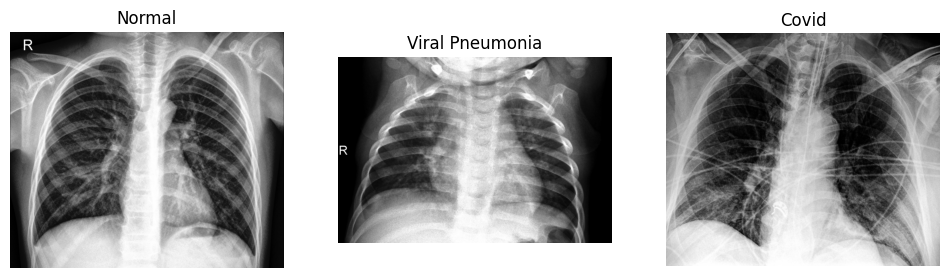

In [29]:
plot_image(image_classes)

In [30]:
data_generator=ImageDataGenerator(rescale=1/255)

In [31]:
train_data=data_generator.flow_from_directory(train_path,
                                             target_size=(224,224),
                                             batch_size=16)

Found 251 images belonging to 3 classes.


In [32]:
test_data=data_generator.flow_from_directory(test_path,
                                             target_size=(224,224),
                                             batch_size=16)

Found 66 images belonging to 3 classes.


In [10]:
mlp_model=Sequential()
mlp_model.add(Flatten(input_shape=(224,224,3)))
mlp_model.add(Dense(128,activation='relu'))
mlp_model.add(Dense(64,activation='relu'))
mlp_model.add(Dense(128,activation='relu'))
mlp_model.add(Dense(3,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    19,267,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,284,675 (73.57 MB)

 Trainable params: 19,284,675 (73.57 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
mlp_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [13]:
model_history=mlp_model.fit(train_data,
                           epochs=5,
                           validation_data=test_data)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/16 ━━━━━━━━━━━━━━━━━━━━ 1:51 7s/step - accuracy: 0.6250 - loss: 1.0282

I0000 00:00:1723200532.118034     125 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723200532.139388     125 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.5403 - loss: 17.8208

W0000 00:00:1723200538.032582     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 469ms/step - accuracy: 0.5606 - loss: 16.4287 - val_accuracy: 0.6667 - val_loss: 3.3452
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 285ms/step - accuracy: 0.8215 - loss: 1.6576 - val_accuracy: 0.8030 - val_loss: 3.2493
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 284ms/step - accuracy: 0.8442 - loss: 1.7039 - val_accuracy: 0.6515 - val_loss: 8.6001
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step - accuracy: 0.7805 - loss: 4.4429 - val_accuracy: 0.7576 - val_loss: 4.3469
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 282ms/step - accuracy: 0.8820 - loss: 1.4899 - val_accuracy: 0.6212 - val_loss: 4.1829


In [14]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn_model.add(MaxPooling2D())

#Flatten
cnn_model.add(Flatten())
#Fully Connect
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dense(128,activation='softmax'))
cnn_model.add(Dense(3,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,495,875 (24.78 MB)

 Trainable params: 6,495,875 (24.78 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
cnn_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [17]:
model_history=cnn_model.fit(train_data,
                           epochs=5,
                           validation_data=test_data)

Epoch 1/5


2024-08-09 10:49:39.791266: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 100575: 1.87379, expected 1.57926
2024-08-09 10:49:39.791639: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150528: 3.95832, expected 3.44133
2024-08-09 10:49:39.791703: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150534: 4.15218, expected 3.63519
2024-08-09 10:49:39.791722: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150535: 4.02956, expected 3.51257
2024-08-09 10:49:39.791743: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150536: 3.63562, expected 3.11863
2024-08-09 10:49:39.791761: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150538: 3.86037, expected 3.34338
2024-08-09 10:49:39.791777: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 150539: 3.47832, expected 2.96133
2024-08-09 10:49:39.

13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.4966 - loss: 1.0719

2024-08-09 10:49:47.340897: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 11: 3.38019, expected 2.90787
2024-08-09 10:49:47.340966: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12: 2.65154, expected 2.17922
2024-08-09 10:49:47.340977: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 13: 3.34933, expected 2.87701
2024-08-09 10:49:47.340986: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 29: 3.57785, expected 3.10553
2024-08-09 10:49:47.340996: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 62: 3.64667, expected 3.17435
2024-08-09 10:49:47.341005: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 63: 3.30996, expected 2.83764
2024-08-09 10:49:47.341014: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 67: 3.19252, expected 2.7202
2024-08-09 10:49:47.341023: E external/local_xla/

15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - accuracy: 0.5050 - loss: 1.0678

2024-08-09 10:49:52.446779: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.87764, expected 2.34552
2024-08-09 10:49:52.446855: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 3.75222, expected 3.2201
2024-08-09 10:49:52.446889: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 3.53736, expected 3.00524
2024-08-09 10:49:52.446903: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 3.89018, expected 3.35806
2024-08-09 10:49:52.446921: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 3.8213, expected 3.28918
2024-08-09 10:49:52.446941: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 3.25469, expected 2.72257
2024-08-09 10:49:52.446954: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 3.88718, expected 3.35506
2024-08-09 10:49:52.446966: E external/local_xla/xla/serv

16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 610ms/step - accuracy: 0.5108 - loss: 1.0643 - val_accuracy: 0.6212 - val_loss: 1.0216
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 276ms/step - accuracy: 0.7011 - loss: 0.9913 - val_accuracy: 0.5606 - val_loss: 1.0220
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - accuracy: 0.6696 - loss: 0.9881 - val_accuracy: 0.5909 - val_loss: 0.9952
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.6176 - loss: 0.9915 - val_accuracy: 0.6212 - val_loss: 0.9789
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 248ms/step - accuracy: 0.6813 - loss: 0.9623 - val_accuracy: 0.6061 - val_loss: 0.9817


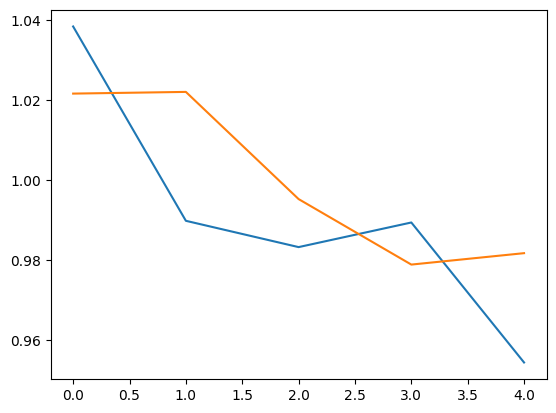

In [18]:
plt.plot(model_history.history['loss'],label='train_loss')
plt.plot(model_history.history['val_loss'],label='validation_loss')

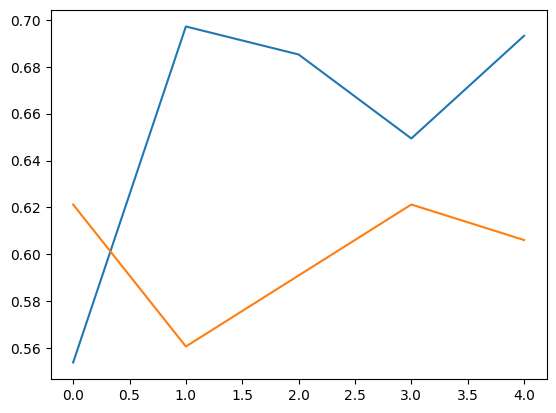

In [19]:
plt.plot(model_history.history['accuracy'],label='train_accuracy')
plt.plot(model_history.history['val_accuracy'],label='validation_accuracy')

In [20]:
cnn_model.save('Covid19_model.h5')

In [22]:
class_map=dict([value,key] for key,value in train_data.class_indices.items())
print(class_map)

{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [40]:
def prediction(test_image,actual_label):
    testing_image=image.load_img(test_image,target_size=(224,224))
    testing_image_array=image.img_to_array(testing_image)/255
    testing_image_input=testing_image_array.reshape(1,testing_image_array.shape[0],
                                                   testing_image_array.shape[1],
                                                   testing_image_array.shape[2])
    predicted_class=np.argmax(cnn_model.predict(testing_image_input))
    preddicted_label=class_map[predicted_class]
    
    plt.figure(figsize=(4,4))
    plt.imshow(testing_image_array)
    plt.title('Actual Label:{},Predicted Label :{}'.format(actual_label,preddicted_label))
    plt.grid()
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


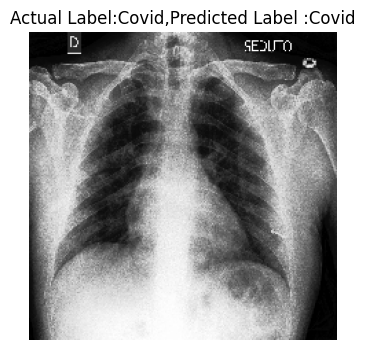

In [41]:
test_image='/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Covid/01.jpeg'
prediction(test_image,actual_label='Covid')